In [1]:
#import independices to our project 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau

%matplotlib inline

In [2]:
data = pd.read_csv('BodyFat - Extended.csv')
data.head(5)

BodyFat Original Sex  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     12.3        Y   M   23   69.97    1.72  36.2   93.1     85.2   94.5   
1      6.1        Y   M   22   78.59    1.84  38.5   93.6     83.0   98.7   
2     25.3        Y   M   22   69.85    1.68  34.0   95.8     87.9   99.2   
3     10.4        Y   M   26   83.80    1.84  37.4  101.8     86.4  101.2   
4     28.7        Y   M   24   83.58    1.81  34.4   97.3    100.0  101.9   

   Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0   59.0  37.3   21.9    32.0     27.4   17.1  
1   58.7  37.3   23.4    30.5     28.9   18.2  
2   59.6  38.9   24.0    28.8     25.2   16.6  
3   60.1  37.3   22.8    32.4     29.4   18.2  
4   63.2  42.2   24.0    32.2     27.7   17.7

In [3]:
data.columns

Index(['BodyFat', 'Original', 'Sex', 'Age', 'Weight', 'Height', 'Neck',
       'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps',
       'Forearm', 'Wrist'],
      dtype='object')

In [4]:
data.shape

(436, 16)

In [5]:
data.dtypes

BodyFat     float64
Original     object
Sex          object
Age           int64
Weight      float64
Height      float64
Neck        float64
Chest       float64
Abdomen     float64
Hip         float64
Thigh       float64
Knee        float64
Ankle       float64
Biceps      float64
Forearm     float64
Wrist       float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BodyFat   436 non-null    float64
 1   Original  436 non-null    object 
 2   Sex       436 non-null    object 
 3   Age       436 non-null    int64  
 4   Weight    436 non-null    float64
 5   Height    436 non-null    float64
 6   Neck      436 non-null    float64
 7   Chest     436 non-null    float64
 8   Abdomen   436 non-null    float64
 9   Hip       436 non-null    float64
 10  Thigh     436 non-null    float64
 11  Knee      436 non-null    float64
 12  Ankle     436 non-null    float64
 13  Biceps    436 non-null    float64
 14  Forearm   436 non-null    float64
 15  Wrist     436 non-null    float64
dtypes: float64(13), int64(1), object(2)
memory usage: 54.6+ KB


In [7]:
data.isnull().sum()

BodyFat     0
Original    0
Sex         0
Age         0
Weight      0
Height      0
Neck        0
Chest       0
Abdomen     0
Hip         0
Thigh       0
Knee        0
Ankle       0
Biceps      0
Forearm     0
Wrist       0
dtype: int64

In [8]:
data.describe()

BodyFat         Age      Weight      Height        Neck       Chest  \
count  436.000000  436.000000  436.000000  436.000000  436.000000  436.000000   
mean    20.249839   34.545872   72.282203    1.734048   35.250917   94.158028   
std      7.502125   15.500099   15.464366    0.098359    3.837908   10.931688   
min      0.000000    1.000000   42.184800    0.750000   26.000000   43.000000   
25%     15.022500   21.000000   59.875200    1.668780   31.500000   85.500000   
50%     20.500000   28.500000   70.815800    1.730000   35.450000   93.050000   
75%     25.410000   46.000000   81.560000    1.800000   38.300000  101.425000   
max     47.500000   81.000000  164.720000    1.970000   51.200000  136.200000   

          Abdomen         Hip       Thigh        Knee       Ankle      Biceps  \
count  436.000000  436.000000  436.000000  436.000000  436.000000  436.000000   
mean    82.816055   98.652294   56.039679   37.365596   22.351835   29.897248   
std     14.652729    6.895034    6.194143    2.768403    1.780513    3.944843   
min     58.000000   82.500000   38.000000   24.700000   18.000000   20.500000   
25%     70.000000   94.000000   51.500000   35.400000   21.000000   26.950000   
50%     82.850000   98.300000   56.000000   37.500000   22.300000   29.800000   
75%     93.225000  102.500000   60.000000   39.000000   23.300000   32.625000   
max    148.100000  147.700000   87.300000   49.100000   33.900000   45.000000   

          Forearm       Wrist  
count  436.000000  436.000000  
mean    26.482110   17.139908  
std      3.155306    1.582291  
min     20.000000   13.500000  
25%     23.700000   16.000000  
50%     26.650000   17.300000  
75%     29.200000   18.400000  
max     34.900000   21.400000

In [9]:
data['Age'].describe()

count    436.000000
mean      34.545872
std       15.500099
min        1.000000
25%       21.000000
50%       28.500000
75%       46.000000
max       81.000000
Name: Age, dtype: float64

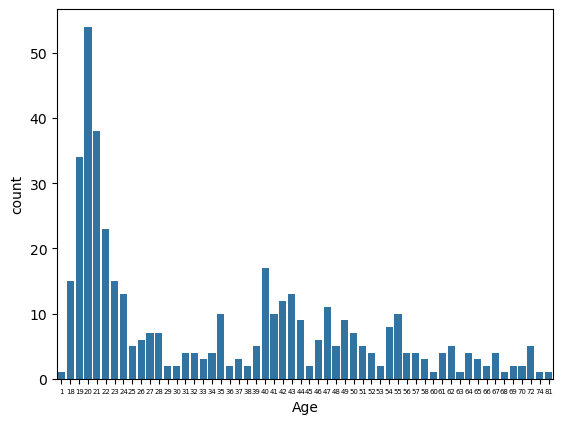

In [10]:
sns.countplot(x='Age',data=data)
plt.xticks(fontsize=5)
plt.show()

# We i want to analyis of Exploratory data analysis 


# Simply we define a function


In [11]:
def describe(df):
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    min_ = []
    max_ = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        
        if df[item].dtypes == 'float64' or df[item].dtypes == 'int64':
            min_.append(df[item].min())
            max_.append(df[item].max())
        else: 
            min_.append('Str')
            max_.append('Str')
            
    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing values' : missing,
        'Min': min_,
        'Max': max_
    })
    
    return output

# i giving the style to my Analysis ,what ever i done....

In [12]:
Styles = [dict(selector = 'caption',
              props = [('color', 'darkblue'),
                       ('fontsize','bold'),
                       ('text-align', 'center'),
                       ('font-size', '20pt')])]

In [13]:
df_ = describe(data)
df_= df_.style.set_caption('Table 1:OverView of dataset').set_table_styles(Styles)
df_

# Add BMI column 

In [14]:
data['Height'].max()

1.97

In [15]:
height_meter = (data['Height'] *39.37* 0.0254).round(2)
weight_kg = (data['Weight'] * 0.454).round(2)
# weight_kg,height_meter
bmi = (weight_kg/height_meter**2).round()

data1 = pd.DataFrame(bmi)
data1

0
0    11.0
1    11.0
2    11.0
3    11.0
4    12.0
..    ...
431  11.0
432   9.0
433  10.0
434   8.0
435   8.0

[436 rows x 1 columns]

In [16]:
data['bmi'] = data1
# data.head(3)
data.insert(0,'Bmi',bmi)

In [17]:
data['Original'].describe()

count     436
unique      2
top         Y
freq      252
Name: Original, dtype: object

In [18]:
data2 = data
data2 = data.drop('Original',axis=1)
data2.head(3)

Bmi  BodyFat Sex  Age  Weight  Height  Neck  Chest  Abdomen   Hip  Thigh  \
0  11.0     12.3   M   23   69.97    1.72  36.2   93.1     85.2  94.5   59.0   
1  11.0      6.1   M   22   78.59    1.84  38.5   93.6     83.0  98.7   58.7   
2  11.0     25.3   M   22   69.85    1.68  34.0   95.8     87.9  99.2   59.6   

   Knee  Ankle  Biceps  Forearm  Wrist   bmi  
0  37.3   21.9    32.0     27.4   17.1  11.0  
1  37.3   23.4    30.5     28.9   18.2  11.0  
2  38.9   24.0    28.8     25.2   16.6  11.0

In [19]:
data2 = data2.drop('bmi',axis=1)
data2

Bmi  BodyFat Sex  Age   Weight  Height  Neck  Chest  Abdomen    Hip  \
0    11.0    12.30   M   23  69.9700  1.7200  36.2   93.1     85.2   94.5   
1    11.0     6.10   M   22  78.5900  1.8400  38.5   93.6     83.0   98.7   
2    11.0    25.30   M   22  69.8500  1.6800  34.0   95.8     87.9   99.2   
3    11.0    10.40   M   26  83.8000  1.8400  37.4  101.8     86.4  101.2   
4    12.0    28.70   M   24  83.5800  1.8100  34.4   97.3    100.0  101.9   
..    ...      ...  ..  ...      ...     ...   ...    ...      ...    ...   
431  11.0    30.40   F   23  59.8752  1.5621  31.3   89.0     71.0   98.5   
432   9.0     7.47   F   21  48.5352  1.5748  29.5   79.0     62.5   89.0   
433  10.0    11.98   F   20  51.7104  1.5748  31.5   81.5     61.5   90.0   
434   8.0    11.24   F   22  50.8032  1.6510  30.5   85.0     64.0   88.0   
435   8.0    17.49   F   24  47.6280  1.6002  26.0   79.3     63.0   86.6   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0     59.0  37.3   21.9    32.0     27.4   17.1  
1     58.7  37.3   23.4    30.5     28.9   18.2  
2     59.6  38.9   24.0    28.8     25.2   16.6  
3     60.1  37.3   22.8    32.4     29.4   18.2  
4     63.2  42.2   24.0    32.2     27.7   17.7  
..     ...   ...    ...     ...      ...    ...  
431   56.0  36.2   21.0    28.0     24.5   16.3  
432   49.0  33.0   20.0    25.0     22.0   15.5  
433   49.5  32.0   19.5    27.5     22.5   15.0  
434   45.0  32.0   19.5    24.0     21.5   15.0  
435   46.0  33.5   19.0    24.0     21.5   14.0  

[436 rows x 16 columns]

In [20]:
data2['Sex'] = data2['Sex'].replace({'M':1,'F':0})
data2.head(3)

C:\Users\Adams\AppData\Local\Temp\ipykernel_596\4101723603.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2['Sex'] = data2['Sex'].replace({'M':1,'F':0})


Bmi  BodyFat  Sex  Age  Weight  Height  Neck  Chest  Abdomen   Hip  Thigh  \
0  11.0     12.3    1   23   69.97    1.72  36.2   93.1     85.2  94.5   59.0   
1  11.0      6.1    1   22   78.59    1.84  38.5   93.6     83.0  98.7   58.7   
2  11.0     25.3    1   22   69.85    1.68  34.0   95.8     87.9  99.2   59.6   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6

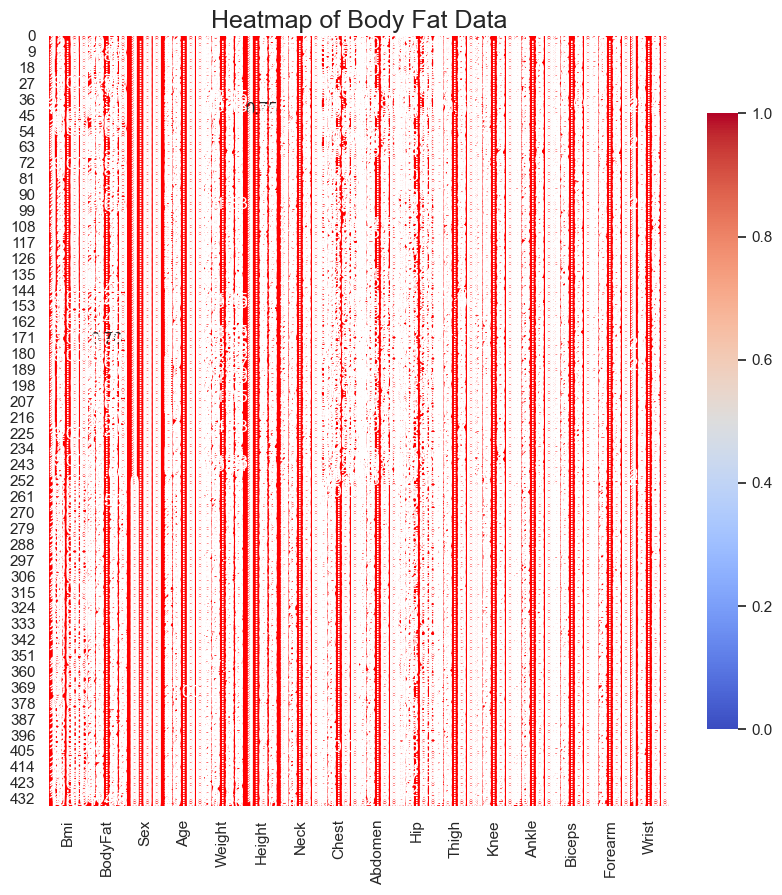

In [21]:
# corr = data.corr('pearson')

sns.set(style='darkgrid')
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(data2, 
                       annot=True,                
                       fmt=".2f",                
                       cmap='coolwarm',          
                       linewidths=.2,            
                       linecolor='red',        
                       cbar_kws={"shrink": .8},
                       vmin=0, vmax=1)  

plt.title('Heatmap of Body Fat Data', fontsize=18)


# Show the heatmap
plt.show()

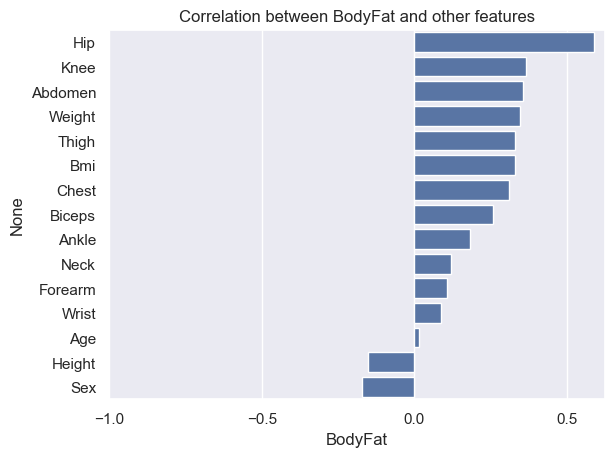

In [22]:
corr = data2.corr()
corr = corr.BodyFat
cr = corr.sort_values(ascending = False)[1:]
sns.barplot(x=cr,y=cr.index)
plt.xticks(np.arange(-1,1,.5))
plt.title('Correlation between BodyFat and other features')
plt.show()

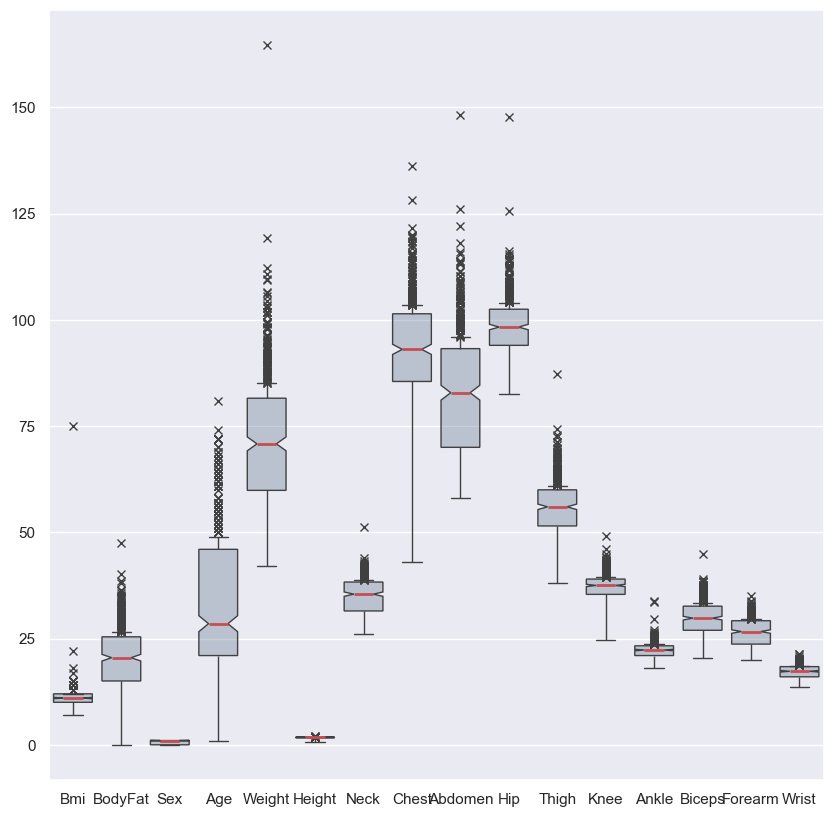

In [23]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data2,notch=True,showcaps=True,flierprops={'marker':'x'},
            boxprops={'facecolor':(.3,.4,.5,.3)},medianprops={'color':'r','linewidth':2},whis=(0,80))
plt.show()

In [24]:
for column in data2:
    plt.figure(figsize=(16,1))
    sns.boxplot(data=data2,x=column,color='lightcoral')

In [25]:
data2 = data2[data2['Bmi']<35]
data2.reset_index()

index   Bmi  BodyFat  Sex  Age   Weight  Height  Neck  Chest  Abdomen  \
0        0  11.0    12.30    1   23  69.9700  1.7200  36.2   93.1     85.2   
1        1  11.0     6.10    1   22  78.5900  1.8400  38.5   93.6     83.0   
2        2  11.0    25.30    1   22  69.8500  1.6800  34.0   95.8     87.9   
3        3  11.0    10.40    1   26  83.8000  1.8400  37.4  101.8     86.4   
4        4  12.0    28.70    1   24  83.5800  1.8100  34.4   97.3    100.0   
..     ...   ...      ...  ...  ...      ...     ...   ...    ...      ...   
430    431  11.0    30.40    0   23  59.8752  1.5621  31.3   89.0     71.0   
431    432   9.0     7.47    0   21  48.5352  1.5748  29.5   79.0     62.5   
432    433  10.0    11.98    0   20  51.7104  1.5748  31.5   81.5     61.5   
433    434   8.0    11.24    0   22  50.8032  1.6510  30.5   85.0     64.0   
434    435   8.0    17.49    0   24  47.6280  1.6002  26.0   79.3     63.0   

       Hip  Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0     94.5   59.0  37.3   21.9    32.0     27.4   17.1  
1     98.7   58.7  37.3   23.4    30.5     28.9   18.2  
2     99.2   59.6  38.9   24.0    28.8     25.2   16.6  
3    101.2   60.1  37.3   22.8    32.4     29.4   18.2  
4    101.9   63.2  42.2   24.0    32.2     27.7   17.7  
..     ...    ...   ...    ...     ...      ...    ...  
430   98.5   56.0  36.2   21.0    28.0     24.5   16.3  
431   89.0   49.0  33.0   20.0    25.0     22.0   15.5  
432   90.0   49.5  32.0   19.5    27.5     22.5   15.0  
433   88.0   45.0  32.0   19.5    24.0     21.5   15.0  
434   86.6   46.0  33.5   19.0    24.0     21.5   14.0  

[435 rows x 17 columns]

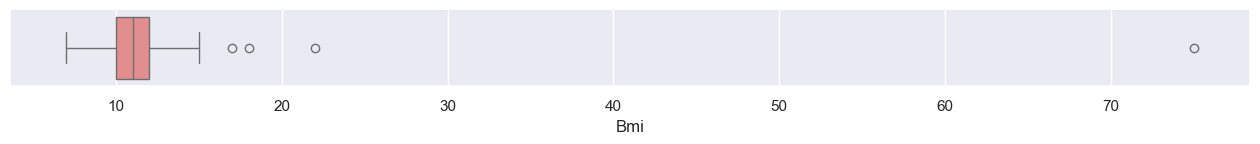

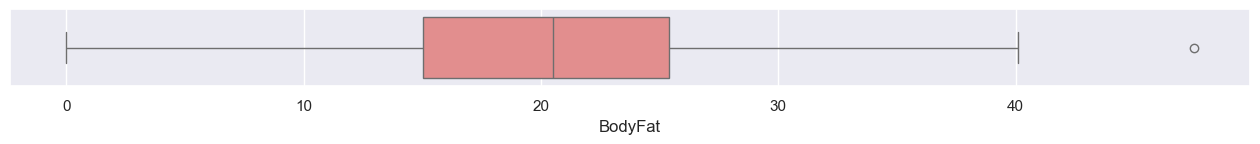

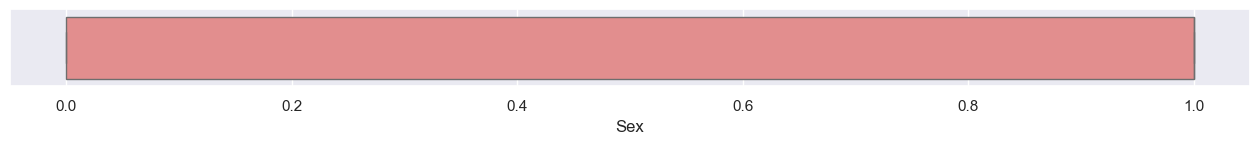

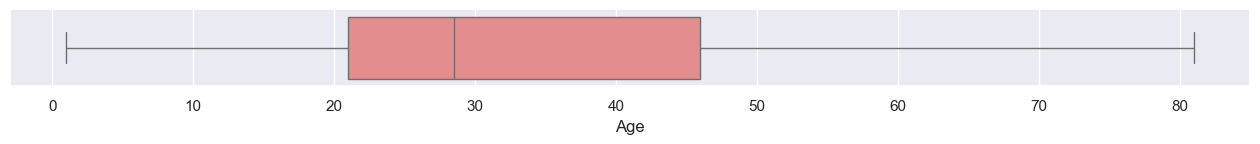

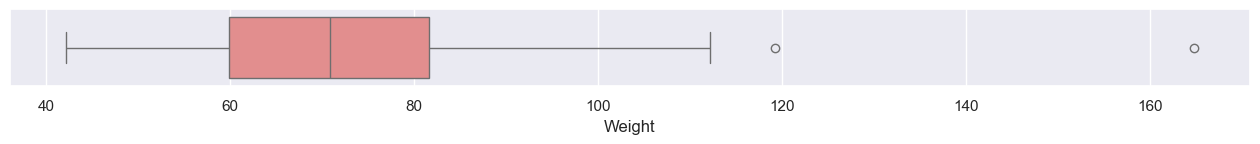

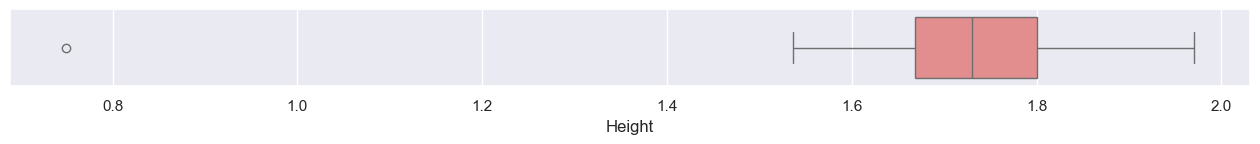

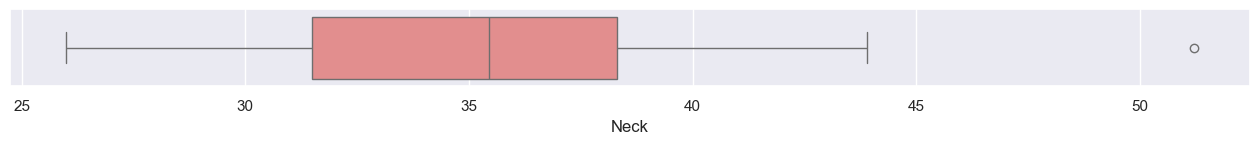

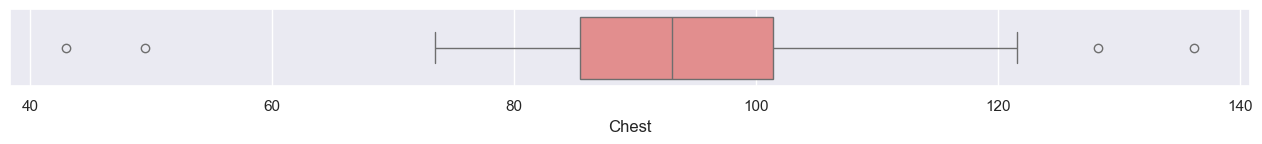

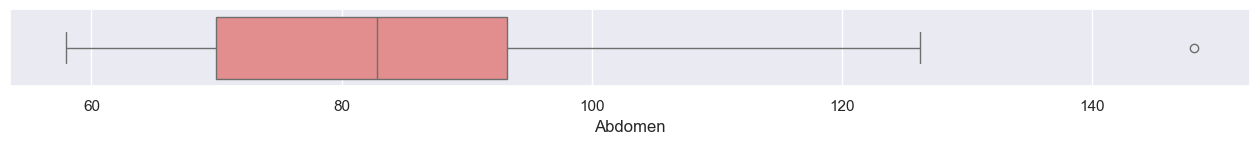

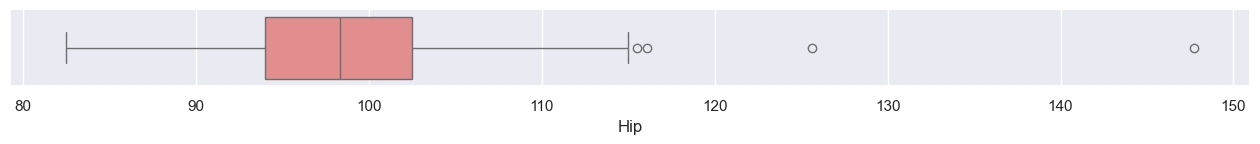

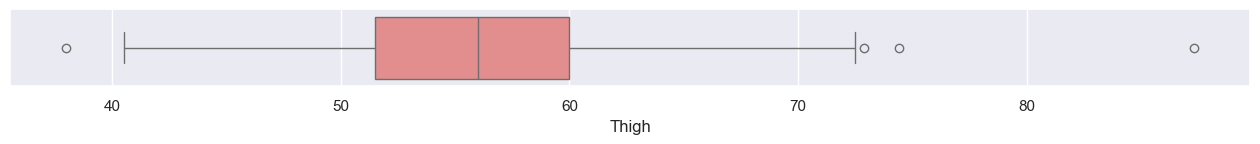

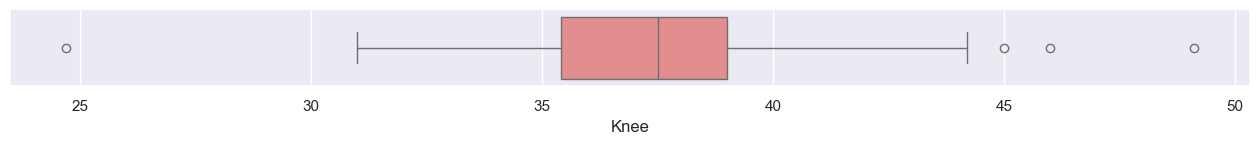

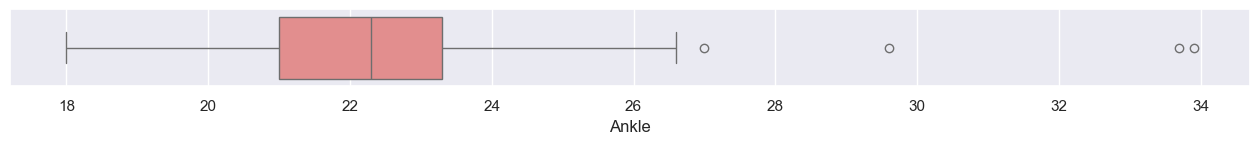

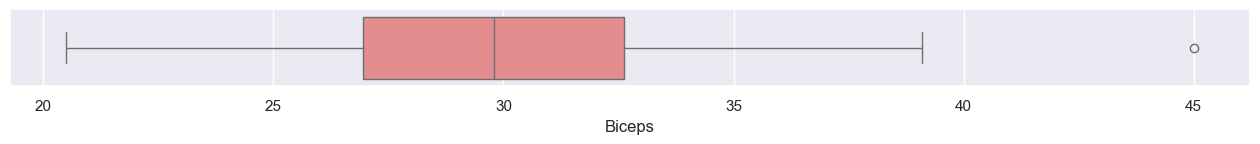

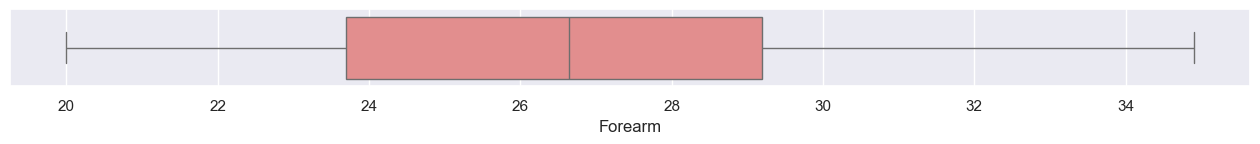

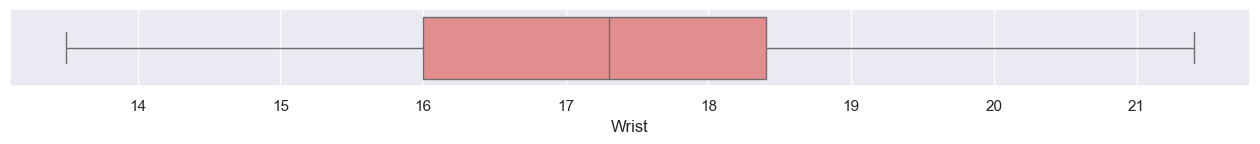

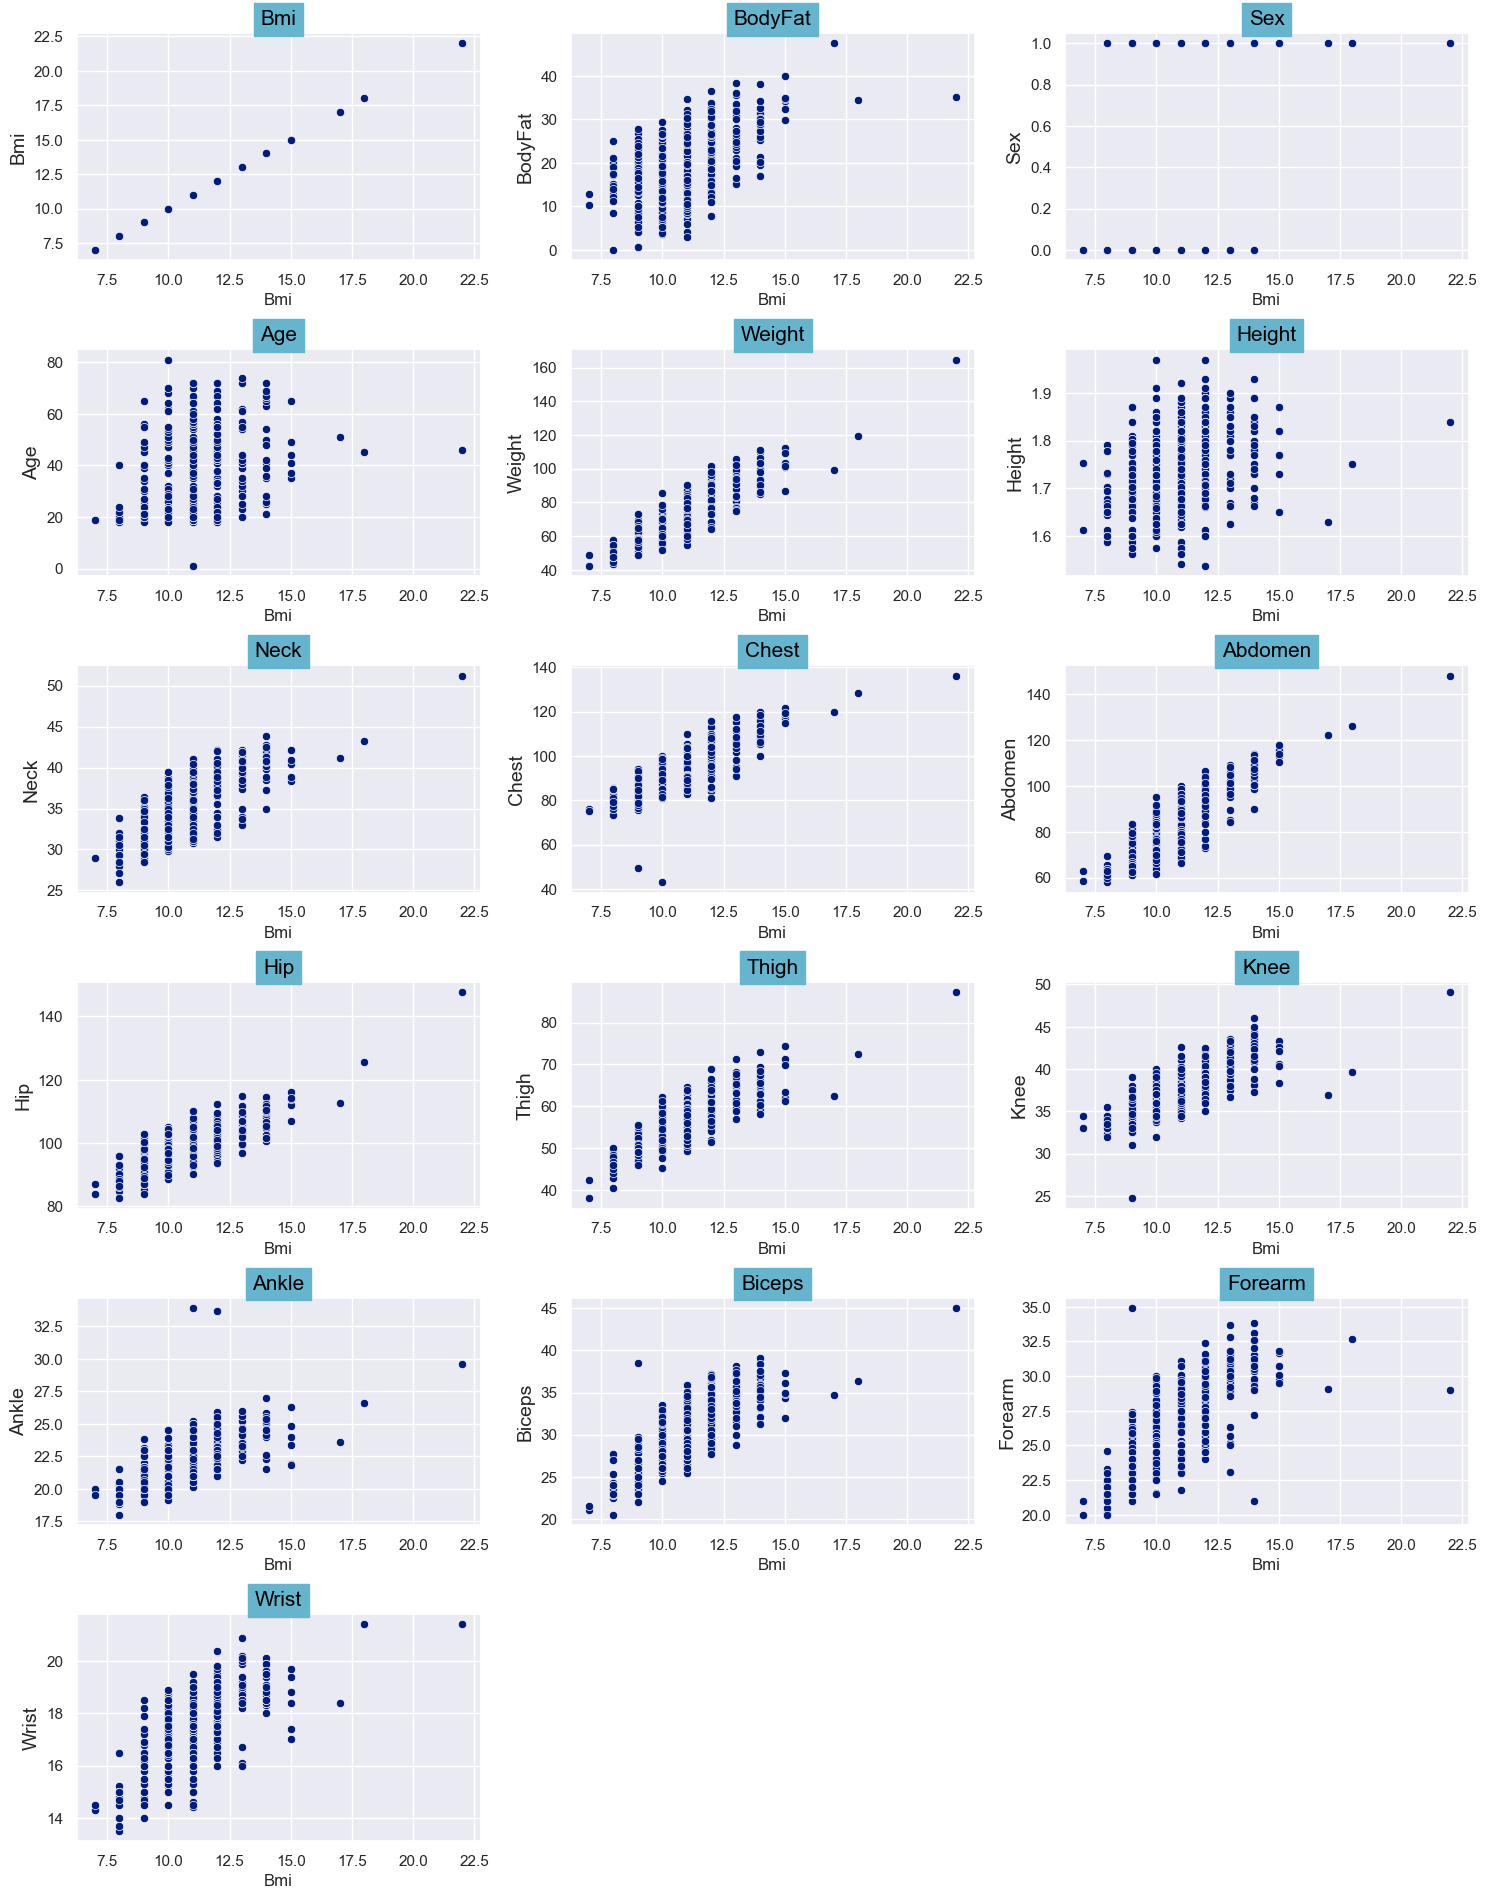

In [26]:
sns.set_palette('dark')
plt.figure(figsize=(15,25))
for idx , i in enumerate (data2):
    plt.subplot(8, 3, idx + 1)
    sns.scatterplot(x =data2['Bmi'], y=data2[i] , data = data2)
    plt.title(i,backgroundcolor='c',color='black',fontsize=15)
    plt.xlabel('Bmi' , size = 12)
    plt.ylabel(i , size = 14)
plt.tight_layout()                     
plt.show()

In [27]:
avg_bodyfat_age = data2.groupby('Age')['BodyFat'].mean().reset_index()
plot = px.line(avg_bodyfat_age, x='Age', y='BodyFat',title = 'Average BodyFat by Age')
plot.show()

In [28]:
avg_BodyFat_age = data2.groupby('BodyFat')['Bmi'].mean().reset_index()
plot = px.line(avg_BodyFat_age, x='BodyFat', y='Bmi',title = 'Average BMI by BodyFat')
plot.show()

In [29]:
plt.figure(figsize=(20,10), dpi=200)
plt.hist(data2['Bmi'])
plt.xticks(np.arange(15,35,1))
plt.title('Bmi Score',fontsize=19)
plt.xlabel('Bmi', fontsize=17)

plt.axvline(x=18.5, color = 'orange', lw=4)
plt.text(16,20, 'Underweight', fontsize=17)
plt.text(16,17, 'Bmi<18.5',fontsize=15)

plt.axvline(x=22, color = 'blue', lw=2)
plt.text(20,40, 'Healthy', fontsize=17)
plt.text(20,37, '18.5<Bmi<24.5',fontsize=15)

plt.axvline(x=27, color = 'red', lw=4)
plt.text(24.5,62, 'Overweight', fontsize=17)
plt.text(24.5,58, '24.5<Bmi<29.5',fontsize=15)

plt.axvline(x=31, color = 'red', lw=6)
plt.text(29.5,40, 'Obesity', fontsize=17)
plt.text(29.5,37, 'Bmi>29.5',fontsize=15)

Text(29.5, 37, 'Bmi>29.5')

In [30]:
data2.head(3)

Bmi  BodyFat  Sex  Age  Weight  Height  Neck  Chest  Abdomen   Hip  Thigh  \
0  11.0     12.3    1   23   69.97    1.72  36.2   93.1     85.2  94.5   59.0   
1  11.0      6.1    1   22   78.59    1.84  38.5   93.6     83.0  98.7   58.7   
2  11.0     25.3    1   22   69.85    1.68  34.0   95.8     87.9  99.2   59.6   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6

In [31]:
data2['Bmi'] = data2['Bmi'].round(1)

C:\Users\Adams\AppData\Local\Temp\ipykernel_596\1402294547.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
data2.head(3)

Bmi  BodyFat  Sex  Age  Weight  Height  Neck  Chest  Abdomen   Hip  Thigh  \
0  11.0     12.3    1   23   69.97    1.72  36.2   93.1     85.2  94.5   59.0   
1  11.0      6.1    1   22   78.59    1.84  38.5   93.6     83.0  98.7   58.7   
2  11.0     25.3    1   22   69.85    1.68  34.0   95.8     87.9  99.2   59.6   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6

In [33]:
def bmi_score(data):
    if data <= 18.5:
        return 'UnderWeight'
    elif data <= 24.5 and data >= 18.5:
        return 'Healthy'
    elif data >= 24.5 and data <= 29.5:
        return 'OverWeight'
    else:
        return 'Obesity'

In [34]:
data2['Bmi_score'] = data2['Bmi'].apply(bmi_score)

C:\Users\Adams\AppData\Local\Temp\ipykernel_596\2725359990.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
data2.head(3)

Bmi  BodyFat  Sex  Age  Weight  Height  Neck  Chest  Abdomen   Hip  Thigh  \
0  11.0     12.3    1   23   69.97    1.72  36.2   93.1     85.2  94.5   59.0   
1  11.0      6.1    1   22   78.59    1.84  38.5   93.6     83.0  98.7   58.7   
2  11.0     25.3    1   22   69.85    1.68  34.0   95.8     87.9  99.2   59.6   

   Knee  Ankle  Biceps  Forearm  Wrist    Bmi_score  
0  37.3   21.9    32.0     27.4   17.1  UnderWeight  
1  37.3   23.4    30.5     28.9   18.2  UnderWeight  
2  38.9   24.0    28.8     25.2   16.6  UnderWeight

In [36]:
data2['Bmi_score'].value_counts()

Bmi_score
UnderWeight    434
Healthy          1
Name: count, dtype: int64

# UnderWeight ---> 0
# Healthy   ----> 1


In [37]:
data2['Bmi_score'] = data2['Bmi_score'].replace({'UnderWeight':'0','Healthy':'1'})

C:\Users\Adams\AppData\Local\Temp\ipykernel_596\3275226088.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
data2.head(2)

Bmi  BodyFat  Sex  Age  Weight  Height  Neck  Chest  Abdomen   Hip  Thigh  \
0  11.0     12.3    1   23   69.97    1.72  36.2   93.1     85.2  94.5   59.0   
1  11.0      6.1    1   22   78.59    1.84  38.5   93.6     83.0  98.7   58.7   

   Knee  Ankle  Biceps  Forearm  Wrist Bmi_score  
0  37.3   21.9    32.0     27.4   17.1         0  
1  37.3   23.4    30.5     28.9   18.2         0

# we find the Lean Body mass for our requirement

In [39]:
def lean_body_mass(wt,ht,sex):
   if sex == 1:
       return (0.407 * wt + 0.267 * ht - 19.2)
   else:
       return 0.252 * wt +0.473 * ht - 48.3


In [40]:
data2['lean_body_mass'] = data2.apply(lambda x : lean_body_mass(x['Weight'],x['Height'],x['Sex']),axis=1)

C:\Users\Adams\AppData\Local\Temp\ipykernel_596\4201670539.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
data2.head(3)

Bmi  BodyFat  Sex  Age  Weight  Height  Neck  Chest  Abdomen   Hip  Thigh  \
0  11.0     12.3    1   23   69.97    1.72  36.2   93.1     85.2  94.5   59.0   
1  11.0      6.1    1   22   78.59    1.84  38.5   93.6     83.0  98.7   58.7   
2  11.0     25.3    1   22   69.85    1.68  34.0   95.8     87.9  99.2   59.6   

   Knee  Ankle  Biceps  Forearm  Wrist Bmi_score  lean_body_mass  
0  37.3   21.9    32.0     27.4   17.1         0         9.73703  
1  37.3   23.4    30.5     28.9   18.2         0        13.27741  
2  38.9   24.0    28.8     25.2   16.6         0         9.67751

# we find the fat mass for our requirement 

In [42]:
def fat_mass(wt,bf):
    return (bf/100)*wt
data2['fat_mass'] = data2.apply(lambda x : fat_mass(x['Weight'],x['BodyFat']),axis=1)

C:\Users\Adams\AppData\Local\Temp\ipykernel_596\2973163735.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
def inchs_height(ht):
    return ht * 39.3701
data2['height_inch'] = data2.apply(lambda x : inchs_height(x['Height']),axis=1)

C:\Users\Adams\AppData\Local\Temp\ipykernel_596\3977992441.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
# data2 = data2.drop('Height',axis=1)
data2.head(3)

Bmi  BodyFat  Sex  Age  Weight  Height  Neck  Chest  Abdomen   Hip  Thigh  \
0  11.0     12.3    1   23   69.97    1.72  36.2   93.1     85.2  94.5   59.0   
1  11.0      6.1    1   22   78.59    1.84  38.5   93.6     83.0  98.7   58.7   
2  11.0     25.3    1   22   69.85    1.68  34.0   95.8     87.9  99.2   59.6   

   Knee  Ankle  Biceps  Forearm  Wrist Bmi_score  lean_body_mass  fat_mass  \
0  37.3   21.9    32.0     27.4   17.1         0         9.73703   8.60631   
1  37.3   23.4    30.5     28.9   18.2         0        13.27741   4.79399   
2  38.9   24.0    28.8     25.2   16.6         0         9.67751  17.67205   

   height_inch  
0    67.716572  
1    72.440984  
2    66.141768

# Now finding the which type of Fat we have...

In [45]:
def categorize_fat(data):
    if data['BodyFat'] < 10:
        return 'Essential Fat'
    elif data['BodyFat'] < 20:
        return 'Subcutaneous Fat'
    elif data['BodyFat'] < 30:
        return 'White Fat'
    elif data['BodyFat'] < 35:
        return 'Visceral Fat'
    elif data['BodyFat'] >= 35:
        return 'Obesity (High Visceral Fat)'
    else:
        return 'Unknown'

In [46]:
data2['fat_type'] = data2.apply(categorize_fat, axis=1)

C:\Users\Adams\AppData\Local\Temp\ipykernel_596\1473905120.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
data2['fat_type'].value_counts()

fat_type
White Fat                      192
Subcutaneous Fat               161
Essential Fat                   41
Visceral Fat                    32
Obesity (High Visceral Fat)      9
Name: count, dtype: int64

# Encoding the types of fats

In [48]:
data2['fat_type'] = data2['fat_type'].replace({'White Fat':'0','Subcutaneous Fat':'1','Essential Fat':'2','Visceral Fat':'3','Obesity (High Visceral Fat)':'4'})

C:\Users\Adams\AppData\Local\Temp\ipykernel_596\190881693.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
data2['fat_type'].value_counts()

fat_type
0    192
1    161
2     41
3     32
4      9
Name: count, dtype: int64

In [50]:
data2.head(2)

Bmi  BodyFat  Sex  Age  Weight  Height  Neck  Chest  Abdomen   Hip  ...  \
0  11.0     12.3    1   23   69.97    1.72  36.2   93.1     85.2  94.5  ...   
1  11.0      6.1    1   22   78.59    1.84  38.5   93.6     83.0  98.7  ...   

   Knee  Ankle  Biceps  Forearm  Wrist  Bmi_score lean_body_mass  fat_mass  \
0  37.3   21.9    32.0     27.4   17.1          0        9.73703   8.60631   
1  37.3   23.4    30.5     28.9   18.2          0       13.27741   4.79399   

   height_inch  fat_type  
0    67.716572         1  
1    72.440984         2  

[2 rows x 21 columns]

In [51]:
def skeleton_mass_muscle(ht,sex,age):
    if sex == 1:
        return (ht**2/50) + (sex * 4.464) + ( age *  -0.057 ) + 4.395
    else:
        return (ht**2/50) + (sex * 4.464) + ( age *  -0.057 ) + 4.395

In [52]:
data2['skeleton_mass_muscle_kg'] = data2.apply(lambda x : skeleton_mass_muscle(x['height_inch'],x['Sex'],x['Age']),axis=1)

C:\Users\Adams\AppData\Local\Temp\ipykernel_596\3276697749.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
data2.head(5)

Bmi  BodyFat  Sex  Age  Weight  Height  Neck  Chest  Abdomen    Hip  ...  \
0  11.0     12.3    1   23   69.97    1.72  36.2   93.1     85.2   94.5  ...   
1  11.0      6.1    1   22   78.59    1.84  38.5   93.6     83.0   98.7  ...   
2  11.0     25.3    1   22   69.85    1.68  34.0   95.8     87.9   99.2  ...   
3  11.0     10.4    1   26   83.80    1.84  37.4  101.8     86.4  101.2  ...   
4  12.0     28.7    1   24   83.58    1.81  34.4   97.3    100.0  101.9  ...   

   Ankle  Biceps  Forearm  Wrist  Bmi_score  lean_body_mass  fat_mass  \
0   21.9    32.0     27.4   17.1          0         9.73703   8.60631   
1   23.4    30.5     28.9   18.2          0        13.27741   4.79399   
2   24.0    28.8     25.2   16.6          0         9.67751  17.67205   
3   22.8    32.4     29.4   18.2          0        15.39788   8.71520   
4   24.0    32.2     27.7   17.7          0        15.30033  23.98746   

   height_inch  fat_type  skeleton_mass_muscle_kg  
0    67.716572         1                99.258682  
1    72.440984         2               112.558923  
2    66.141768         0                95.099669  
3    72.440984         1               112.330923  
4    71.259881         0               109.050413  

[5 rows x 22 columns]

In [54]:
data2['skeleton_mass_muscle_kg'].describe()

count    435.000000
mean      98.691891
std       10.493373
min       76.517079
25%       90.375094
50%       98.475103
75%      106.534809
max      127.856271
Name: skeleton_mass_muscle_kg, dtype: float64

# now data preprocessing term

In [55]:
data2.columns

Index(['Bmi', 'BodyFat', 'Sex', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist', 'Bmi_score', 'lean_body_mass', 'fat_mass', 'height_inch',
       'fat_type', 'skeleton_mass_muscle_kg'],
      dtype='object')

In [56]:
x = data2[['height_inch', 'Weight', 'Age','Sex']]
y = data2[['Bmi', 'BodyFat','Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist', 'Bmi_score', 'lean_body_mass', 'fat_mass', 'fat_type',
       'skeleton_mass_muscle_kg']]


In [57]:
x,y

(     height_inch   Weight  Age  Sex
 0      67.716572  69.9700   23    1
 1      72.440984  78.5900   22    1
 2      66.141768  69.8500   22    1
 3      72.440984  83.8000   26    1
 4      71.259881  83.5800   24    1
 ..           ...      ...  ...  ...
 431    61.500033  59.8752   23    0
 432    62.000033  48.5352   21    0
 433    62.000033  51.7104   20    0
 434    65.000035  50.8032   22    0
 435    63.000034  47.6280   24    0
 
 [435 rows x 4 columns],
       Bmi  BodyFat  Neck  Chest  Abdomen    Hip  Thigh  Knee  Ankle  Biceps  \
 0    11.0    12.30  36.2   93.1     85.2   94.5   59.0  37.3   21.9    32.0   
 1    11.0     6.10  38.5   93.6     83.0   98.7   58.7  37.3   23.4    30.5   
 2    11.0    25.30  34.0   95.8     87.9   99.2   59.6  38.9   24.0    28.8   
 3    11.0    10.40  37.4  101.8     86.4  101.2   60.1  37.3   22.8    32.4   
 4    12.0    28.70  34.4   97.3    100.0  101.9   63.2  42.2   24.0    32.2   
 ..    ...      ...   ...    ...      ...    ... 

# Training the model

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
x.shape,x_train.shape,x_test.shape

((435, 4), (348, 4), (87, 4))

# Standardize features

In [60]:
# Preprocessing for numerical features
numeric_features = ['height_inch', 'Weight', 'Age', 'Sex']

In [61]:
scaler = StandardScaler()

In [62]:
x_trained_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [63]:
x_trained_scaled

array([[ 0.94407543, -0.15029819,  1.35102182,  0.84515425],
       [-0.4399219 , -1.30076664, -0.82074954, -1.18321596],
       [-0.34390855,  0.25497612,  1.81170059,  0.84515425],
       ...,
       [-0.14251469, -0.86651682, -0.88656079, -1.18321596],
       [-0.4399219 , -0.75071686, -1.0181833 , -1.18321596],
       [ 1.5295227 ,  1.06616296,  0.9561543 ,  0.84515425]])

In [64]:
# keras model

model = keras.Sequential([
    layers.Dense(512,activation='relu',kernel_regularizer=l1_l2(0.01),input_shape=(x_trained_scaled.shape[1],)),
    layers.Dropout(0.05),
    layers.Dense(128,activation='relu',kernel_regularizer=l1_l2(0.01)),
    layers.Dropout(0.05),
    layers.Dense(64,activation='relu', kernel_regularizer=l1_l2(0.01)),
    layers.Dropout(0.05),
    layers.Dense(32,activation='relu',kernel_regularizer=l1_l2(0.01)),
    layers.BatchNormalization(),
    layers.Dense(y.shape[1])
])


C:\Users\Adams\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [65]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.002), 
              loss='mean_squared_error',metrics=['mae'])

In [66]:
# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)


In [67]:
# Train the model
history = model.fit(x_trained_scaled, y_train, epochs=300, batch_size=32,
                    validation_split=0.2,callbacks=[early_stopping,lr_scheduler],verbose=1)

Epoch 1/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - loss: 2750.8970 - mae: 39.5249 - val_loss: 2671.9717 - val_mae: 38.9156 - learning_rate: 0.0020
Epoch 2/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2666.3376 - mae: 38.9523 - val_loss: 2648.5144 - val_mae: 38.7799 - learning_rate: 0.0020
Epoch 3/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2659.9175 - mae: 38.8852 - val_loss: 2627.0002 - val_mae: 38.6321 - learning_rate: 0.0020
Epoch 4/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2683.2197 - mae: 39.0987 - val_loss: 2608.6233 - val_mae: 38.4978 - learning_rate: 0.0020
Epoch 5/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2627.1721 - mae: 38.6519 - val_loss: 2587.4927 - val_mae: 38.3171 - learning_rate: 0.0020
Epoch 6/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2673.3569 - mae: 39.0531 - val_loss: 2564.6074 - val_mae: 38.1104 - learning_rate: 0.0020
Epoch 7/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2633.9375 - mae: 38.6557 - val_loss: 2555.6731 - val

In [68]:
# Evaluate the model on test data
loss = model.evaluate(x_test_scaled, y_test)
print(f'Test Loss: {loss}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 6.7388 - mae: 1.4740 
Test Loss: [6.79073429107666, 1.4695818424224854]


In [69]:
data2.iloc[100]

Bmi                             11.0
BodyFat                         20.4
Sex                                1
Age                               48
Weight                         78.81
Height                          1.83
Neck                            37.0
Chest                           99.1
Abdomen                         92.0
Hip                             98.3
Thigh                           59.3
Knee                            38.4
Ankle                           22.4
Biceps                          27.9
Forearm                         26.2
Wrist                           17.0
Bmi_score                          0
lean_body_mass              13.36428
fat_mass                    16.07724
height_inch                72.047283
fat_type                           0
skeleton_mass_muscle_kg    109.93922
Name: 101, dtype: object

In [70]:
new_data = pd.DataFrame({
    'height_inch': [72.047283],
    'Weight': [78.81],
    'Age': [48],
    'Sex': [1]  # Assuming 1 represents Male
})

In [71]:
# Transform new data using the scaler
new_data_scaled = scaler.transform(new_data)

pred = model.predict(new_data_scaled)

# y = data2[['Bmi', 'BodyFat','Neck', 'Chest',
#        'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
#        'Wrist', 'Bmi_score', 'lean_body_mass', 'fat_mass', 'fat_type',
#        'skeleton_mass_muscle_kg']]

pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


array([[ 1.0910447e+01,  1.7120972e+01,  3.7729599e+01,  9.9050613e+01,
         9.0228462e+01,  9.9307259e+01,  5.9269306e+01,  3.8407711e+01,
         2.2986076e+01,  3.1872984e+01,  2.8529924e+01,  1.8140514e+01,
        -2.5898010e-02,  1.3301501e+01,  1.4056412e+01,  7.1499979e-01,
         1.0748707e+02]], dtype=float32)

In [72]:
data2.iloc[100]

Bmi                             11.0
BodyFat                         20.4
Sex                                1
Age                               48
Weight                         78.81
Height                          1.83
Neck                            37.0
Chest                           99.1
Abdomen                         92.0
Hip                             98.3
Thigh                           59.3
Knee                            38.4
Ankle                           22.4
Biceps                          27.9
Forearm                         26.2
Wrist                           17.0
Bmi_score                          0
lean_body_mass              13.36428
fat_mass                    16.07724
height_inch                72.047283
fat_type                           0
skeleton_mass_muscle_kg    109.93922
Name: 101, dtype: object

In [73]:
data2.columns

Index(['Bmi', 'BodyFat', 'Sex', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist', 'Bmi_score', 'lean_body_mass', 'fat_mass', 'height_inch',
       'fat_type', 'skeleton_mass_muscle_kg'],
      dtype='object')

In [74]:
column_names = ['Bmi', 'BodyFat', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist', 'Bmi_score', 'lean_body_mass', 'fat_mass',
       'fat_type', 'skeleton_mass_muscle_kg']
pred_df = pd.DataFrame(pred, columns=column_names)
pred_df

Bmi    BodyFat       Neck      Chest    Abdomen        Hip  \
0  10.910447  17.120972  37.729599  99.050613  90.228462  99.307259   

       Thigh       Knee      Ankle     Biceps    Forearm      Wrist  \
0  59.269306  38.407711  22.986076  31.872984  28.529924  18.140514   

   Bmi_score  lean_body_mass   fat_mass  fat_type  skeleton_mass_muscle_kg  
0  -0.025898       13.301501  14.056412     0.715               107.487068

In [75]:
data2.iloc[100]

Bmi                             11.0
BodyFat                         20.4
Sex                                1
Age                               48
Weight                         78.81
Height                          1.83
Neck                            37.0
Chest                           99.1
Abdomen                         92.0
Hip                             98.3
Thigh                           59.3
Knee                            38.4
Ankle                           22.4
Biceps                          27.9
Forearm                         26.2
Wrist                           17.0
Bmi_score                          0
lean_body_mass              13.36428
fat_mass                    16.07724
height_inch                72.047283
fat_type                           0
skeleton_mass_muscle_kg    109.93922
Name: 101, dtype: object

In [76]:
#save my modle into keras format

tf.keras.models.save_model(model,'my_model.h5')


In [77]:
# !pip install pyreadstat
pred_df.to_pickle('predictions.pkl')

In [78]:
# !pip install --upgrade tensorflow
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [79]:
import tensorflow as tf
print(tf.__version__)

2.18.0
